# Telecom X - Estudio de Fuga de Clientes

La compañía experimenta un elevado nivel de bajas de usuarios y busca identificar las causas que impulsan este comportamiento.

Este estudio incluye:

* Obtención y tratamiento de datos a través de una API externa.

* Implementación del proceso ETL (Extracción, Transformación y Carga) para la depuración y organización de la información.

* Desarrollo de visualizaciones clave para detectar patrones y comportamientos relevantes.

* Exploración de los datos (EDA) y elaboración de un reporte con hallazgos significativos.

#📌 Extracción

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# URL RAW del JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar directamente el JSON desde la URL a un DataFrame
df = pd.read_json(url)

#🔧 Transformación

In [ ]:
# 1. Mostrar las filas del DataFrame

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# 2. Obtener información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
# 3. Verificar tipos de datos de cada columna
print(df.dtypes)

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [ ]:
# 4. Resumen estadístico de las columnas numéricas
df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [ ]:
# 5. Cargar el diccionario desde GitHub
diccionario_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_diccionario.md"
diccionario = pd.read_csv(diccionario_url, sep=":", header=None, names=["Variable", "Descripción"])

# 6. Mostrar las primeras filas del diccionario
diccionario.head()

,Variable,Descripción
0,#### Diccionario de datos,NaN
1,- `customerID`,número de identificación único de cada cliente
2,- `Churn`,si el cliente dejó o no la empresa
3,- `gender`,género (masculino y femenino)
4,- `SeniorCitizen`,información sobre si un cliente tiene o no un...


In [ ]:
#7. Expandir automáticamente las columnas que contienen diccionarios

# Detectar columnas que contienen al menos un diccionario
dict_columns = []
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        dict_columns.append(col)

print("=== Columnas que contienen diccionarios (JSON anidado) ===")
print(dict_columns)

=== Columnas que contienen diccionarios (JSON anidado) ===
['customer', 'phone', 'internet', 'account']


In [ ]:
# 8. Expandir y unir columnas anidadas

for col in dict_columns:
    expanded = df[col].apply(pd.Series)
    expanded.columns = [f"{col}_{subcol}" for subcol in expanded.columns]
    # 8.1. Unirlas al DataFrame principal y eliminar las originales.
    df = pd.concat([df.drop(columns=[col]), expanded], axis=1)

print("\n=== DataFrame después de expandir columnas ===")
print(df.head())


=== DataFrame después de expandir columnas ===
   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes         

In [ ]:
# 9. Filas duplicadas
print("\n=== Filas duplicadas ===")
# Detectar si aún quedan columnas con diccionarios o listas
unhashable_cols = []
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, (dict, list))).any():
        unhashable_cols.append(col)

if unhashable_cols:
    print("\n⚠️ Aún hay columnas con valores tipo dict o list:")
    print(unhashable_cols)
    print("Estas columnas serán eliminadas temporalmente para operaciones de análisis.")
    df_hashable = df.drop(columns=unhashable_cols)
else:
    df_hashable = df

print(df_hashable.duplicated().sum())


=== Filas duplicadas ===

⚠️ Aún hay columnas con valores tipo dict o list:
['account_Charges']
Estas columnas serán eliminadas temporalmente para operaciones de análisis.
0


In [ ]:
print(df.columns.tolist())  # para confirmar nombre exacto de la columna

['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges']


### Validación y limpieza básica del DataFrame

In [ ]:
# 1. Parsear dataset

# Parsear la columna 'account_Charges'
# Si el valor es dict, lo convertimos, si es string con dict, lo evaluamos
import ast
import numpy as np

def parse_account_charges(value):
    if isinstance(value, dict):
        return value
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)  # seguro para strings que representan dicts
        except:
            return {}
    return {}

# Convertir toda la columna a dicts reales
df['account_Charges_parsed'] = df['account_Charges'].apply(parse_account_charges)

# Extraer valores de 'MonthlyCharges'
def safe_float_monthly(x):
    if isinstance(x, dict):
        monthly = x.get('Monthly')
        try:
            return float(monthly)
        except:
            return np.nan
    return np.nan

df['MonthlyCharges'] = df['account_Charges_parsed'].apply(safe_float_monthly)

# Extraer valores de 'TotalCharges'
def safe_float_total(x):
    if isinstance(x, dict):
        total = x.get('Total')
        try:
            return float(total.strip()) if isinstance(total, str) else float(total)
        except:
            return np.nan
    return np.nan

df['TotalCharges'] = df['account_Charges_parsed'].apply(safe_float_total)

# Verificamos nulos y tipos
print("Valores nulos después del procesamiento:\n", df[['MonthlyCharges', 'TotalCharges']].isnull().sum())
print("\nTipos de datos actualizados:\n", df[['MonthlyCharges', 'TotalCharges']].dtypes)

# Eliminar columnas originales
df.drop(columns=['account_Charges', 'account_Charges_parsed'], inplace=True)


Valores nulos después del procesamiento:
 MonthlyCharges     0
TotalCharges      11
dtype: int64

Tipos de datos actualizados:
 MonthlyCharges    float64
TotalCharges      float64
dtype: object


In [ ]:
# 2. Recalcular filas donde TotalCharges es NaN
# Imputar TotalCharges como MonthlyCharges * customer_tenure

# Ver cuántos faltan
missing_total = df['TotalCharges'].isnull()
print(f"Filas con TotalCharges faltante: {missing_total.sum()}")

# Recalcular solo donde falte
df.loc[missing_total, 'TotalCharges'] = (
    df.loc[missing_total, 'MonthlyCharges'] * df.loc[missing_total, 'customer_tenure']
)

# Verificar nuevamente
print(f"Filas con TotalCharges faltante después de imputar: {df['TotalCharges'].isnull().sum()}")

Filas con TotalCharges faltante: 11
Filas con TotalCharges faltante después de imputar: 0


In [ ]:
# 3. Nuevamente Verificamos nulos y tipos
print("Valores nulos después del procesamiento:\n", df[['MonthlyCharges', 'TotalCharges']].isnull().sum())
print("\nTipos de datos actualizados:\n", df[['MonthlyCharges', 'TotalCharges']].dtypes)


Valores nulos después del procesamiento:
 MonthlyCharges    0
TotalCharges      0
dtype: int64

Tipos de datos actualizados:
 MonthlyCharges    float64
TotalCharges      float64
dtype: object


In [ ]:
print(df.columns.tolist())  # para confirmar nombre exacto de la columna

['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:
# === ANÁLISIS DE CALIDAD DE DATOS === #

# 4. Información general
print("\n=== Información general ===")
print(df.info())

# 5. Valores nulos
print("\n=== Valores ausentes por columna ===")
print(df.isnull().sum())



=== Información general ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSuppor

In [ ]:
# 6. Tipos únicos por columna
print("\n=== Tipos únicos por columna ===")
for col in df.columns:
    unique_types = pd.Series(df[col].dropna().map(type).unique())
    counts = df[col].dropna().map(type).value_counts()
    print(f"\nColumna: {col} → Tipos únicos:")
    print(counts.to_dict())


=== Tipos únicos por columna ===

Columna: customerID → Tipos únicos:
{<class 'str'>: 7267}

Columna: Churn → Tipos únicos:
{<class 'str'>: 7267}

Columna: customer_gender → Tipos únicos:
{<class 'str'>: 7267}

Columna: customer_SeniorCitizen → Tipos únicos:
{<class 'int'>: 7267}

Columna: customer_Partner → Tipos únicos:
{<class 'str'>: 7267}

Columna: customer_Dependents → Tipos únicos:
{<class 'str'>: 7267}

Columna: customer_tenure → Tipos únicos:
{<class 'int'>: 7267}

Columna: phone_PhoneService → Tipos únicos:
{<class 'str'>: 7267}

Columna: phone_MultipleLines → Tipos únicos:
{<class 'str'>: 7267}

Columna: internet_InternetService → Tipos únicos:
{<class 'str'>: 7267}

Columna: internet_OnlineSecurity → Tipos únicos:
{<class 'str'>: 7267}

Columna: internet_OnlineBackup → Tipos únicos:
{<class 'str'>: 7267}

Columna: internet_DeviceProtection → Tipos únicos:
{<class 'str'>: 7267}

Columna: internet_TechSupport → Tipos únicos:
{<class 'str'>: 7267}

Columna: internet_Streaming

In [ ]:
# 7. Inconsistencias en columnas categóricas
print("\n=== Valores únicos en columnas categóricas ===")
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts(dropna=False))


=== Valores únicos en columnas categóricas ===

Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Columna: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Columna: customer_gender
customer_gender
Male      3675
Female    3592
Name: count, dtype: int64

Columna: customer_Partner
customer_Partner
No     3749
Yes    3518
Name: count, dtype: int64

Columna: customer_Dependents
customer_Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Columna: phone_PhoneService
phone_PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Columna: phone_MultipleLines
phone_MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Columna: internet_InternetService
internet_InternetService
Fiber optic    3198

In [ ]:
# 8. Limpiar columna 'Churn'
df['Churn'] = df['Churn'].str.strip()
df['Churn'] = df['Churn'].replace('', np.nan)
# Ver cuántos quedan nulos
print(df['Churn'].isnull().sum())

224


In [ ]:
#9. Redundante categoría 'No phone service. Reemplazar por "No"

internet_cols = [
    'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies'
]

for col in internet_cols:
    df[col] = df[col].replace('No internet service', 'No')


#🔎 Estandarización y transformación de datos

In [ ]:
# 1. Mapear columnas binarias a 0 y 1
binary_cols = [
    'Churn', 'customer_gender', 'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling'
]

# 2.Reemplazos personalizados para algunas columnas
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['customer_gender'] = df['customer_gender'].map({'Male': 1, 'Female': 0})
df['phone_MultipleLines'] = df['phone_MultipleLines'].replace({'No phone service': 'No'})
df['phone_MultipleLines'] = df['phone_MultipleLines'].map({'Yes': 1, 'No': 0})

# Mapear otras binarias (Yes/No)
other_binary_cols = [
    'customer_Partner', 'customer_Dependents', 'phone_PhoneService',
    'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling'
]

for col in other_binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# 3. One-hot encoding para columnas categóricas con más de 2 valores
multi_cat_cols = [
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod'
]

df_original = df.copy()
df = pd.get_dummies(df, columns=multi_cat_cols, prefix=['Internet', 'Contract', 'Payment'], dtype=int)


# 4. Verificar que ya no haya valores no numéricos
print(df.dtypes)
print("\nNulos restantes por columna:\n", df.isnull().sum())


customerID                            object
Churn                                float64
customer_gender                        int64
customer_SeniorCitizen                 int64
customer_Partner                       int64
customer_Dependents                    int64
customer_tenure                        int64
phone_PhoneService                     int64
phone_MultipleLines                    int64
internet_OnlineSecurity                int64
internet_OnlineBackup                  int64
internet_DeviceProtection              int64
internet_TechSupport                   int64
internet_StreamingTV                   int64
internet_StreamingMovies               int64
account_PaperlessBilling               int64
MonthlyCharges                       float64
TotalCharges                         float64
Internet_DSL                           int64
Internet_Fiber optic                   int64
Internet_No                            int64
Contract_Month-to-month                int64
Contract_O

In [ ]:
# 5. Guardar archivo CSV con datos luego de ETL
df.to_csv("datos_tratados.csv", index=False)

#📊 Carga y análisis

### Análisis Descriptivo

In [ ]:
# 1. Análisis descriptivo de las columnas numéricas
descripcion_general = df.describe()

# Mostramos el resultado
print(descripcion_general)


             Churn  customer_gender  customer_SeniorCitizen  customer_Partner  \
count  7043.000000      7267.000000             7267.000000       7267.000000   
mean      0.265370         0.505711                0.162653          0.484106   
std       0.441561         0.500002                0.369074          0.499782   
min       0.000000         0.000000                0.000000          0.000000   
25%       0.000000         0.000000                0.000000          0.000000   
50%       0.000000         1.000000                0.000000          0.000000   
75%       1.000000         1.000000                0.000000          1.000000   
max       1.000000         1.000000                1.000000          1.000000   

       customer_Dependents  customer_tenure  phone_PhoneService  \
count          7267.000000      7267.000000         7267.000000   
mean              0.300124        32.346498            0.902711   
std               0.458343        24.571773            0.296371   
mi

In [ ]:
# 2. Resumen complementario
print("Valores nulos por columna:\n", df.isnull().sum())
print("\nTipos de datos:\n", df.dtypes)
print("\nValores únicos por columna:\n", df.nunique())


Valores nulos por columna:
 customerID                             0
Churn                                224
customer_gender                        0
customer_SeniorCitizen                 0
customer_Partner                       0
customer_Dependents                    0
customer_tenure                        0
phone_PhoneService                     0
phone_MultipleLines                    0
internet_OnlineSecurity                0
internet_OnlineBackup                  0
internet_DeviceProtection              0
internet_TechSupport                   0
internet_StreamingTV                   0
internet_StreamingMovies               0
account_PaperlessBilling               0
MonthlyCharges                         0
TotalCharges                           0
Internet_DSL                           0
Internet_Fiber optic                   0
Internet_No                            0
Contract_Month-to-month                0
Contract_One year                      0
Contract_Two year            

In [ ]:
# 3. Creacion de Columna de cuentas diarias

# Crear la columna Cuentas_Diarias como estimación diaria de facturación
df['Cuentas_Diarias'] = df['MonthlyCharges'] / 30

# Revisamos un resumen de la nueva columna
df['Cuentas_Diarias'].describe()

df.describe()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,...,Internet_Fiber optic,Internet_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Bank transfer (automatic),Payment_Credit card (automatic),Payment_Electronic check,Payment_Mailed check,Cuentas_Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,...,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,...,0.440072,0.217559,0.551122,0.209027,0.239851,0.218660,0.215770,0.336452,0.229118,2.157337
std,0.441561,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,...,0.496430,0.412614,0.497414,0.406642,0.427022,0.413366,0.411384,0.472528,0.420294,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.180833
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.343333
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.995833
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.958333


### Distribución de evasión

/tmp/ipython-input-26-3811405818.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], data=df, x='Churn', palette=colors)
/tmp/ipython-input-26-3811405818.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Permanece', 'Abandona'])


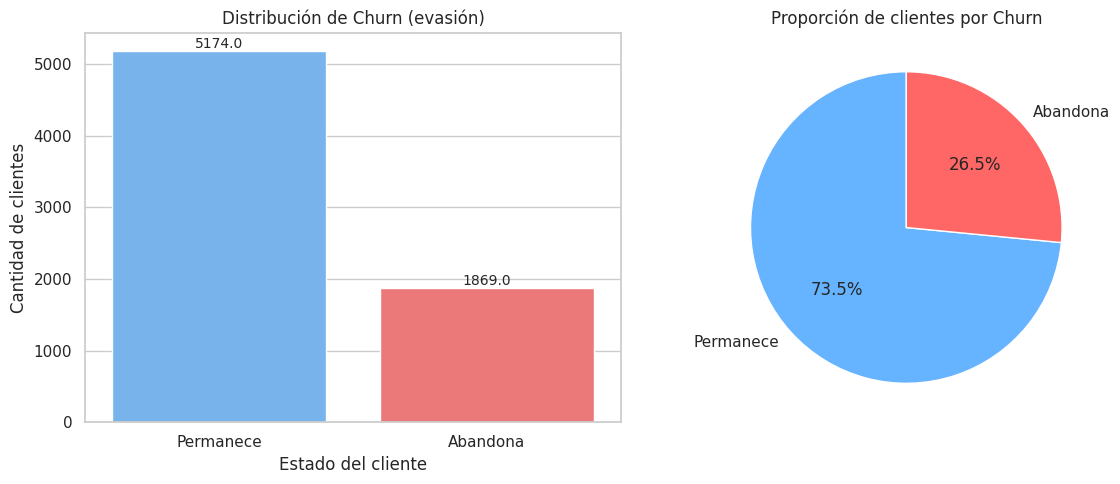

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Colores personalizados
colors = ['#66b3ff', '#ff6666']  # azul y rojo

# Filtrar y ordenar valores
churn_counts = df[df['Churn'].isin([0, 1])]['Churn'].value_counts().sort_index()

# Crear figura
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras
sns.countplot(ax=axes[0], data=df, x='Churn', palette=colors)
axes[0].set_title('Distribución de Churn (evasión)')
axes[0].set_xlabel('Estado del cliente')
axes[0].set_ylabel('Cantidad de clientes')
axes[0].set_xticklabels(['Permanece', 'Abandona'])

# Mostrar los valores encima de las barras
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10)

# Gráfico de pastel
axes[1].pie(
    churn_counts,
    labels=['Permanece', 'Abandona'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)
axes[1].set_title('Proporción de clientes por Churn')

# Ajuste general
plt.tight_layout()
plt.show()


### Recuento de evasión por variables categóricas

/tmp/ipython-input-27-4127818273.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-27-4127818273.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-27-4127818273.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-27-4127818273.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-27-4127818273.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-27-4127818273.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


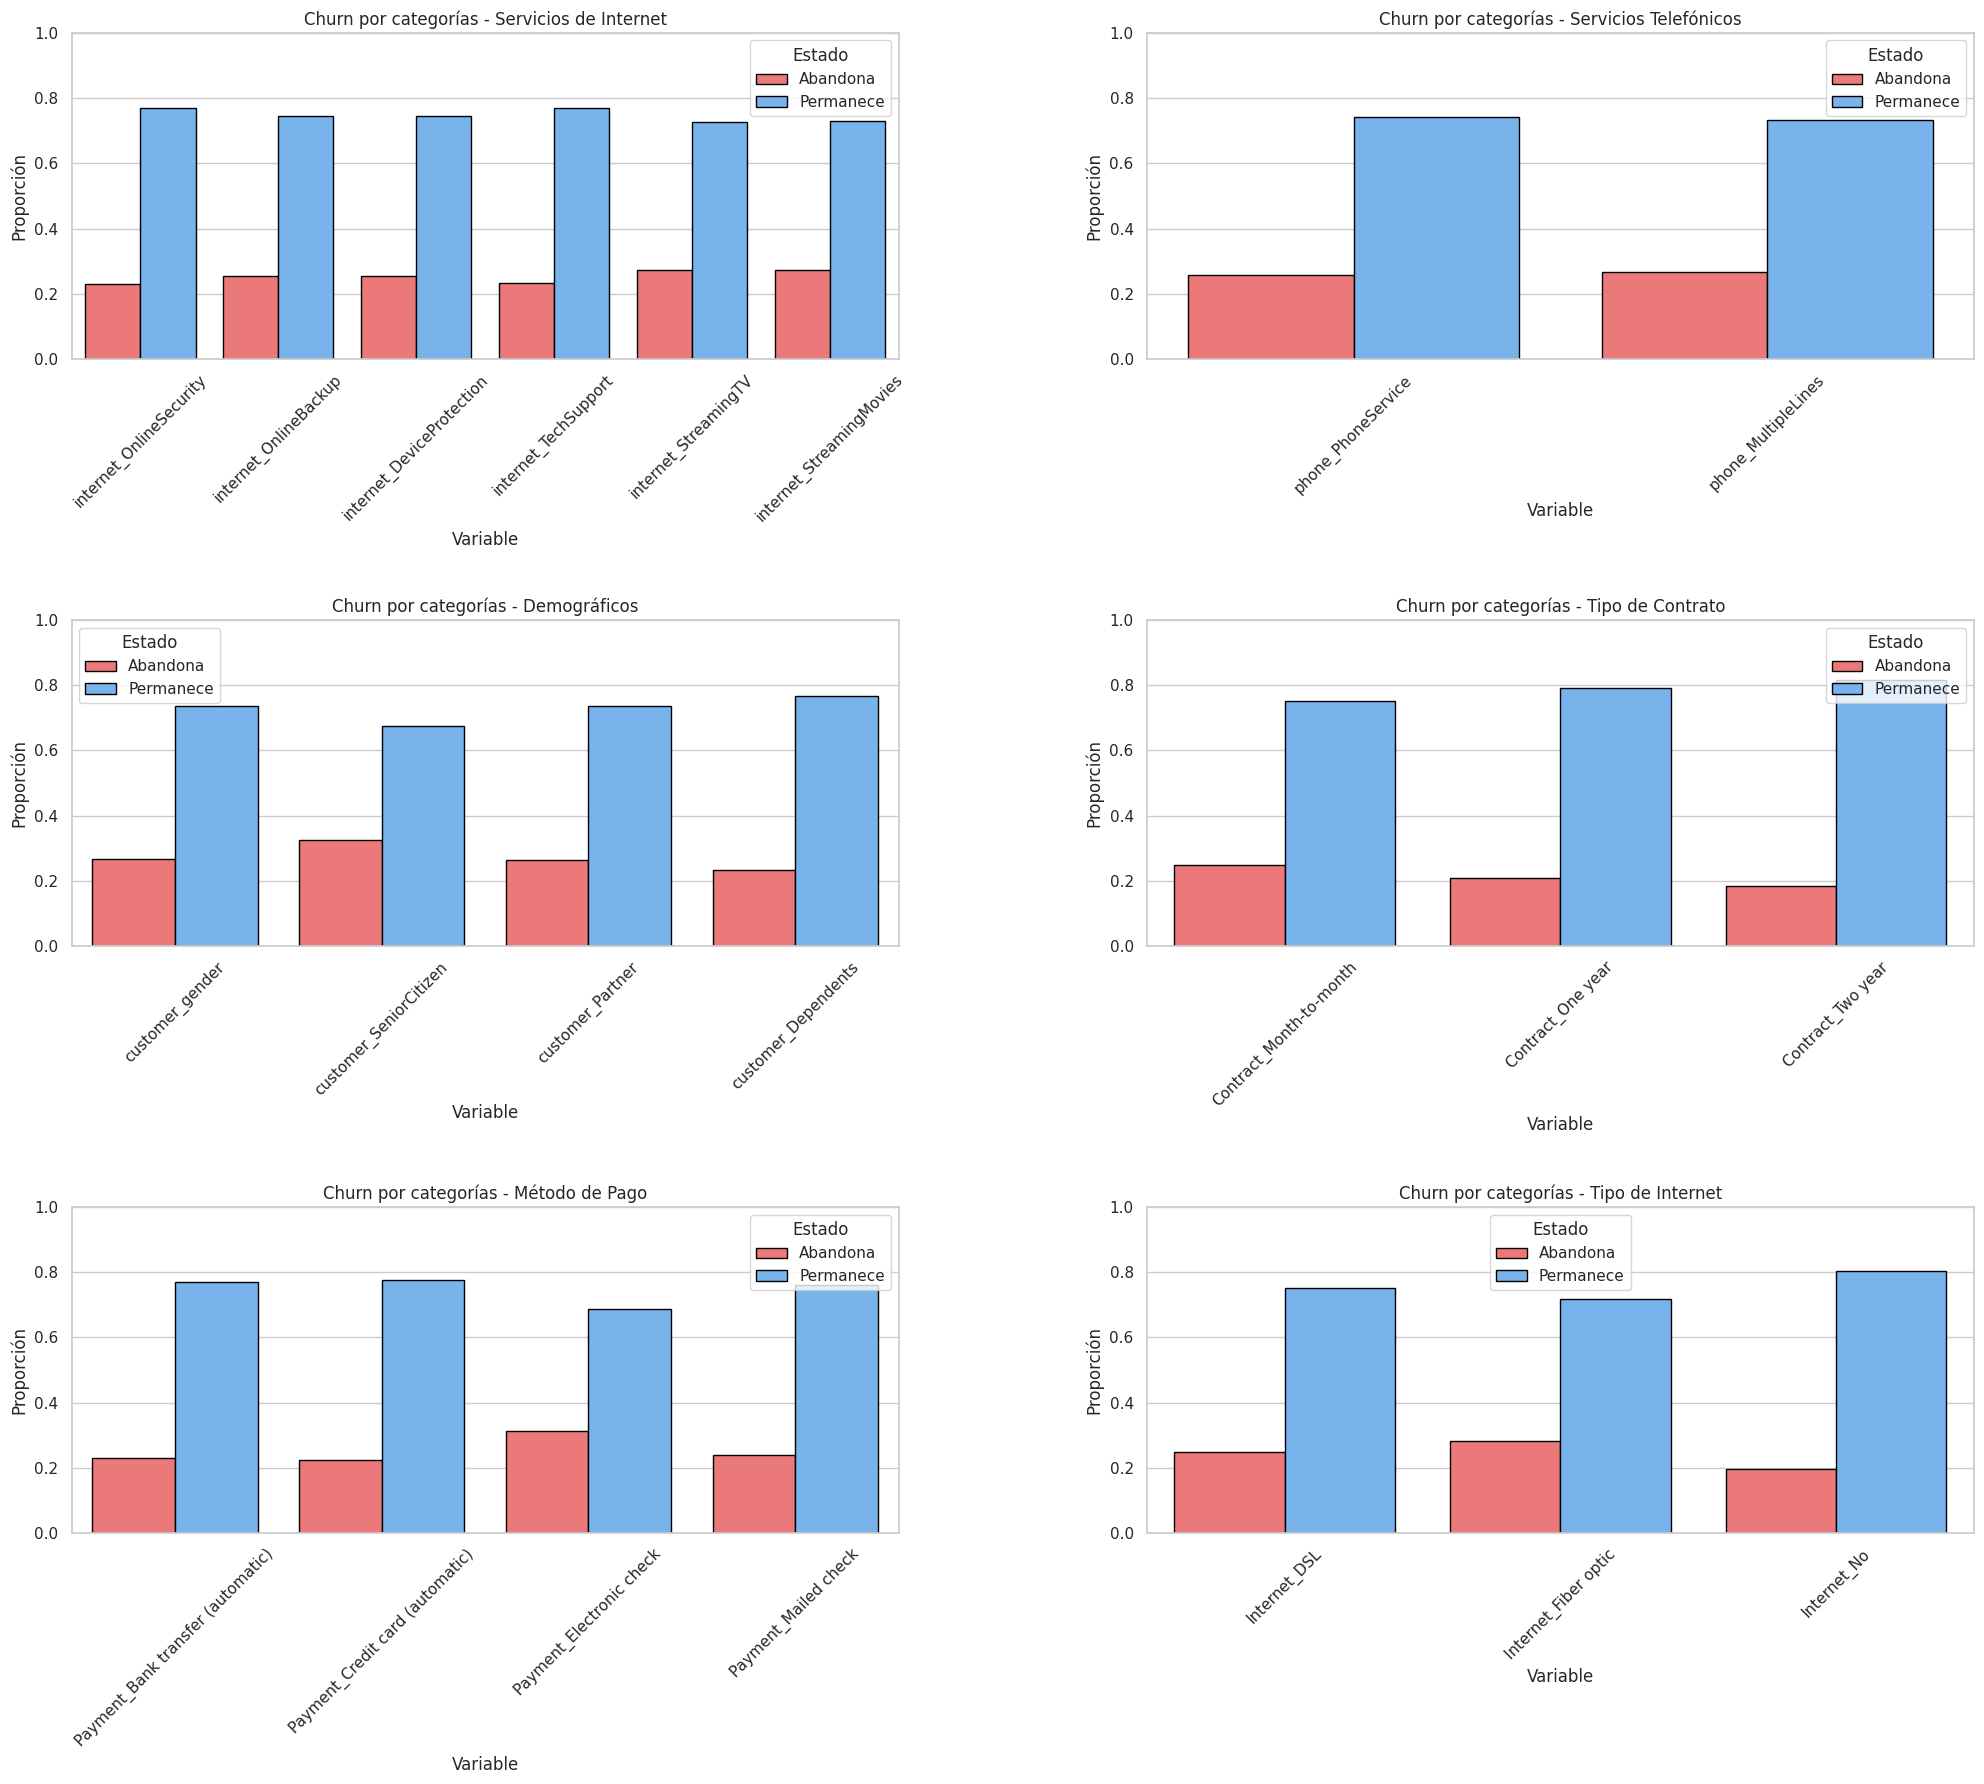

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

sns.set(style="whitegrid")

# Grupos de columnas
servicios_cols = [
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]

phone_cols = ['phone_PhoneService', 'phone_MultipleLines']

demo_cols = ['customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents']

contract_cols = ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']

payment_cols = [
    'Payment_Bank transfer (automatic)', 'Payment_Credit card (automatic)',
    'Payment_Electronic check', 'Payment_Mailed check'
]

internet_cols = ['Internet_DSL', 'Internet_Fiber optic', 'Internet_No']

# Colores personalizados para "Permanece" (azul) y "Abandona" (rojo)
colors = ['#ff6666', '#66b3ff']  # rojo, azul

df_plot = df.copy()
df_plot['Churn_str'] = df_plot['Churn'].map({0: 'Permanece', 1: 'Abandona'})

# Función para graficar un grupo en un axis dado
def plot_group_on_axis(ax, group_cols, title):
    plot_data = []

    for col in group_cols:
        if col not in df_plot.columns:
            continue

        df_plot[col] = df_plot[col].map({0:'No', 1:'Sí'}) if set(df_plot[col].dropna().unique()) <= {0,1} else df_plot[col]

        temp = df_plot.groupby([col, 'Churn_str']).size().reset_index(name='count')
        totals = temp.groupby(col)['count'].transform('sum')
        temp['proportion'] = temp['count'] / totals
        temp['variable'] = col
        temp.rename(columns={col:'category'}, inplace=True)
        plot_data.append(temp)

    plot_data = pd.concat(plot_data, ignore_index=True)

    sns.barplot(
        data=plot_data,
        x='variable',
        y='proportion',
        hue='Churn_str',
        palette=colors,
        ci=None,
        edgecolor='black',
        ax=ax
    )
    ax.set_title(f'Churn por categorías - {title}')
    ax.set_ylabel('Proporción')
    ax.set_xlabel('Variable')
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Estado')

# Listado de grupos y sus títulos
groups = [
    (servicios_cols, 'Servicios de Internet'),
    (phone_cols, 'Servicios Telefónicos'),
    (demo_cols, 'Demográficos'),
    (contract_cols, 'Tipo de Contrato'),
    (payment_cols, 'Método de Pago'),
    (internet_cols, 'Tipo de Internet')
]

# Preparar figura con 2 columnas
n_cols = 2
n_rows = math.ceil(len(groups) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*10, n_rows*6))
axes = axes.flatten()

# Graficar cada grupo en un subplot
for i, (cols, title) in enumerate(groups):
    plot_group_on_axis(axes[i], cols, title)

# Eliminar axes sobrantes si los hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()



### Conteo de evasión por variables numéricas

Boxplots (diagramas de caja)

/tmp/ipython-input-28-2737603932.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_plot, palette=colors, ax=axes[i])
/tmp/ipython-input-28-2737603932.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-28-2737603932.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_plot, palette=colors, ax=axes[i])
/tmp/ipython-input-28-2737603932.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedL

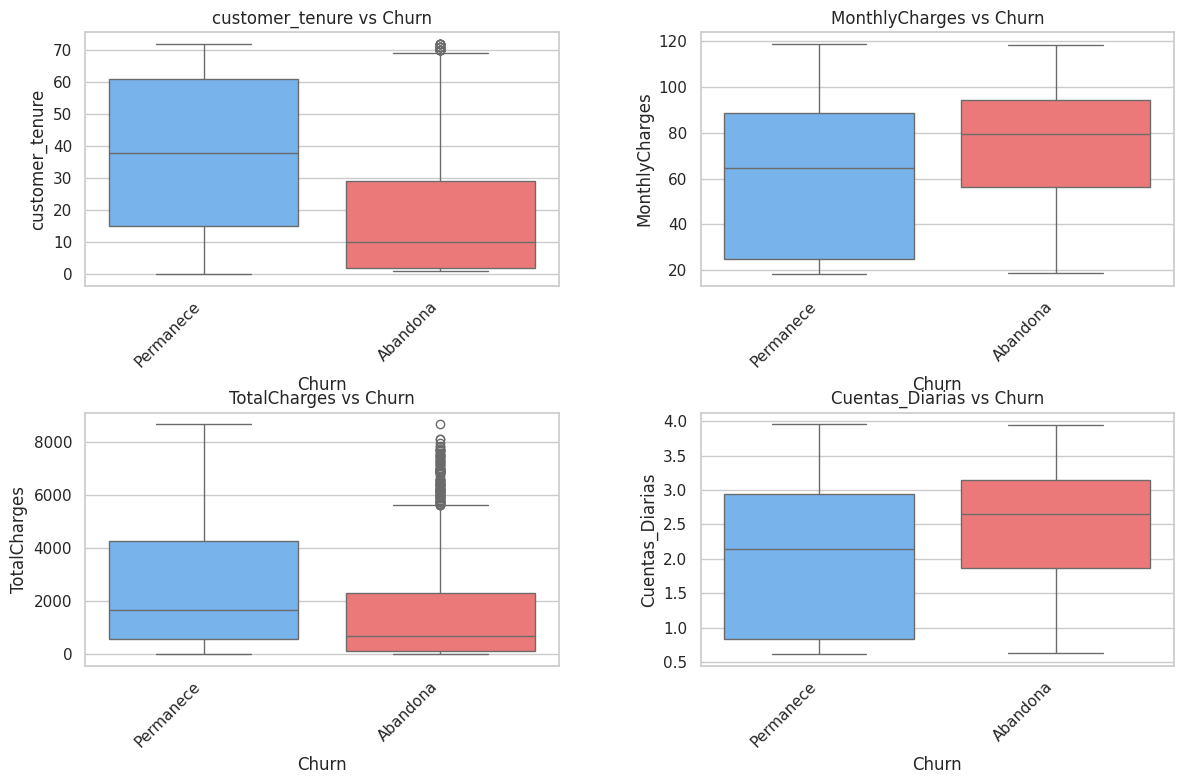

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set(style="whitegrid")

numeric_vars = ['customer_tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias']

n_cols = 2
n_rows = math.ceil(len(numeric_vars) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

# Colores personalizados para "Permanece" (azul) y "Abandona" (rojo)
colors = ['#66b3ff', '#ff6666']

# Crear copia con Churn mapeado a "Permanece" y "Abandona"
df_plot = df.copy()
df_plot['Churn'] = df_plot['Churn'].map({0: 'Permanece', 1: 'Abandona'})

for i, col in enumerate(numeric_vars):
    sns.boxplot(x='Churn', y=col, data=df_plot, palette=colors, ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

    # Rotar etiquetas X para mejor legibilidad
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()




### Conteo de evasión por variables binarias

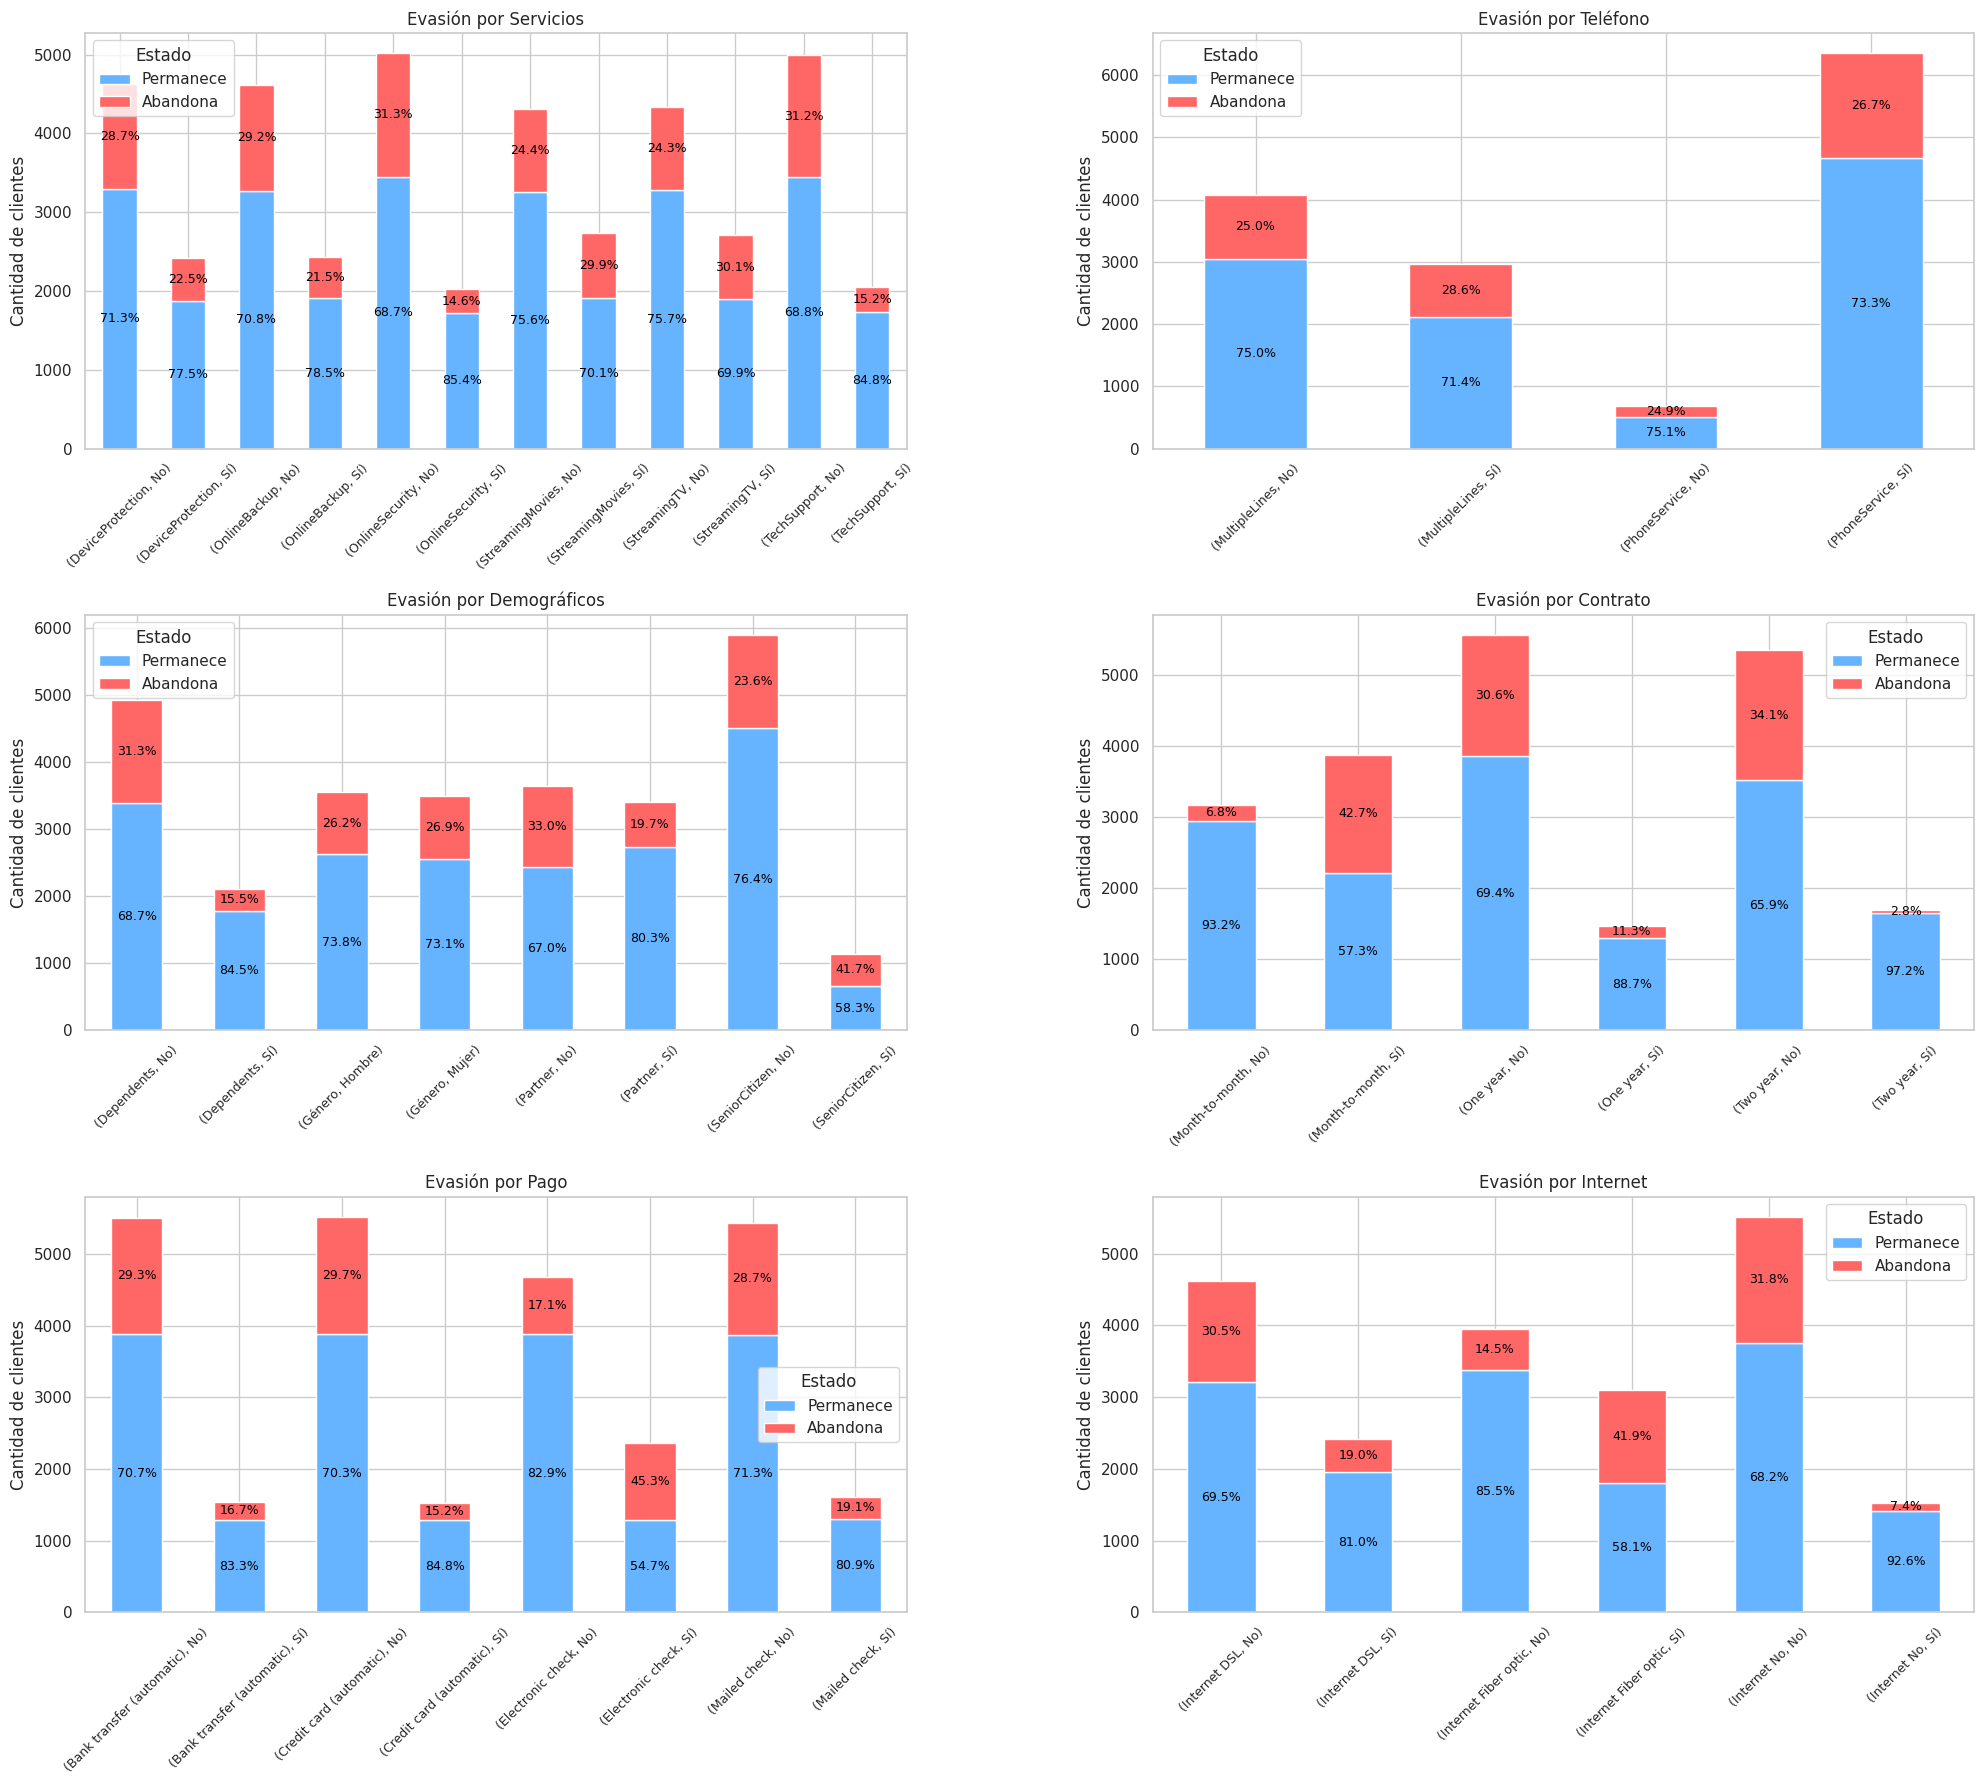

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd

sns.set(style="whitegrid")
colors = ['#66b3ff', '#ff6666']  # azul y rojo

# Definir grupos y sus columnas
categories = {
    'Servicios': [
        'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
        'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
    ],
    'Teléfono': ['phone_PhoneService', 'phone_MultipleLines'],
    'Demográficos': ['customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents'],
    'Contrato': ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'],
    'Pago': [
        'Payment_Bank transfer (automatic)', 'Payment_Credit card (automatic)',
        'Payment_Electronic check', 'Payment_Mailed check'
    ],
    'Internet': ['Internet_DSL', 'Internet_Fiber optic', 'Internet_No']
}

# Crear columna Churn con etiquetas
df_plot = df.copy()
df_plot['Churn_Label'] = df_plot['Churn'].map({0: 'Permanece', 1: 'Abandona'})

ncols = 2
nrows = math.ceil(len(categories) / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 10, nrows * 6))
axes = axes.flatten()

for i, (cat_name, cols) in enumerate(categories.items()):
    ax = axes[i]

    data = []
    for col in cols:
        if col not in df_plot.columns:
            continue

        tmp = df_plot[[col, 'Churn_Label']].copy()

        # Ajustar etiqueta de subcategoría
        if col == 'customer_gender':
            tmp['Variable'] = 'Género'
            tmp['Subcategoría'] = tmp[col].map({0: 'Mujer', 1: 'Hombre'})
        else:
            variable_name = col.replace('_', ' ').replace('customer ', '').replace('internet ', '').replace('phone ', '').replace('Payment ', '').replace('Contract ', '')
            tmp['Variable'] = variable_name
            tmp['Subcategoría'] = tmp[col].map({0: 'No', 1: 'Sí'})

        tmp = tmp[['Variable', 'Subcategoría', 'Churn_Label']]
        tmp.columns = ['Variable', 'Subcategoría', 'Churn']
        data.append(tmp)

    if data:
        cat_df = pd.concat(data)

        # Contar valores por subcategoría y churn
        counts = cat_df.groupby(['Variable', 'Subcategoría', 'Churn']).size().unstack(fill_value=0)
        counts = counts.reindex(columns=['Permanece', 'Abandona'])

        # Calcular porcentajes
        percentages = counts.div(counts.sum(axis=1), axis=0) * 100

        # Graficar
        bars = counts.plot(kind='bar', stacked=True, color=colors, ax=ax)

        # Agregar % sobre las barras
        for idx, row in counts.iterrows():
            total = row.sum()
            for j, val in enumerate(row):
                percent = percentages.loc[idx].iloc[j]
                if val > 0:
                    ax.text(
                        x=bars.containers[j][list(counts.index).index(idx)].get_x() +
                          bars.containers[j][list(counts.index).index(idx)].get_width() / 2,
                        y=row[:j+1].sum() - val / 2,
                        s=f'{percent:.1f}%',
                        ha='center',
                        va='center',
                        fontsize=9,
                        color='black'
                    )

        ax.set_title(f'Evasión por {cat_name}')
        ax.set_xlabel('')
        ax.set_ylabel('Cantidad de clientes')
        ax.legend(title='Estado')
        ax.tick_params(axis='x', rotation=45, labelsize=9)
    else:
        ax.axis('off')  # Si no hay datos válidos, apagar ese subplot

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


### Gráfico de calor (heatmap) de tasas de evasión por variable y subcategorías

 * Muestra la tasa de churn (%) de cada subcategoría, organizada por variable.

 * Útil para encontrar patrones fuertes de abandono.

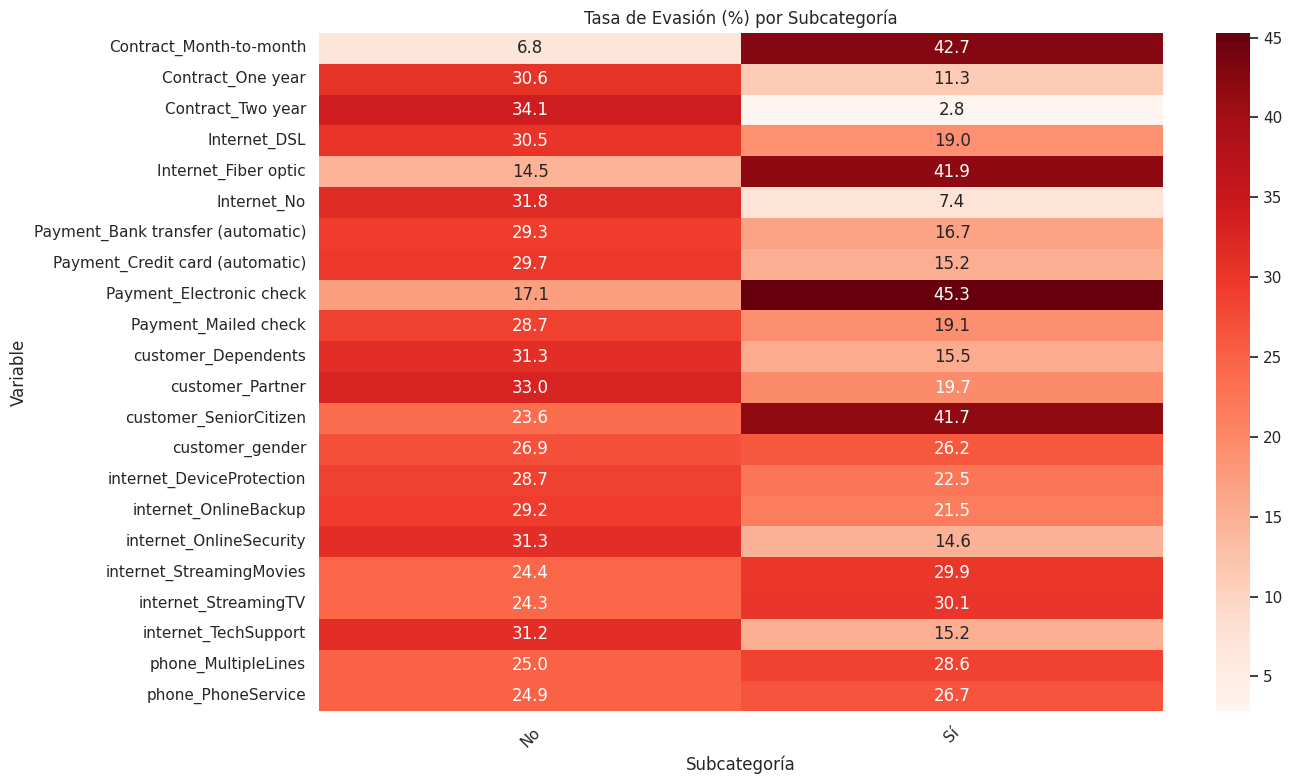

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupamos y calculamos tasa de churn por variable y subcategoría
churn_rates = []

for cat_name, cols in categories.items():
    for col in cols:
        if col not in df.columns:
            continue
        temp = df[[col, 'Churn']].copy()
        if set(temp[col].dropna().unique()) <= {0, 1}:
            temp[col] = temp[col].map({0: 'No', 1: 'Sí'})
        rates = temp.groupby(col)['Churn'].mean() * 100
        for val, rate in rates.items():
            churn_rates.append([cat_name, col, val, round(rate, 1)])

heat_df = pd.DataFrame(churn_rates, columns=['Categoría', 'Variable', 'Subcategoría', 'Churn %'])

# Pivot para heatmap
pivot = heat_df.pivot_table(index='Variable', columns='Subcategoría', values='Churn %')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, annot=True, cmap='Reds', fmt=".1f")
plt.title('Tasa de Evasión (%) por Subcategoría')
plt.xlabel('Subcategoría')
plt.ylabel('Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Sankey diagram con etiquetas descriptivas

 * Género
 * Contrato
 * Internet
 * Evasión

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Copia del dataframe original
df_sankey = df.copy()

# Mapear nombres legibles
df_sankey['Churn'] = df_sankey['Churn'].map({0: 'Permanece', 1: 'Abandona'})
df_sankey['customer_gender'] = df_sankey['customer_gender'].map({0: 'Femenino', 1: 'Masculino'})

# Internet
def internet_tipo(row):
    if row['Internet_DSL'] == 1:
        return 'DSL'
    elif row['Internet_Fiber optic'] == 1:
        return 'Fiber optic'
    elif row['Internet_No'] == 1:
        return 'Sin internet'
    else:
        return 'Desconocido'

df_sankey['Internet'] = df_sankey.apply(internet_tipo, axis=1)

# Agrupar
sankey_df = df_sankey.groupby(['customer_gender', 'Internet', 'Churn']).size().reset_index(name='count')

# Etiquetas únicas
labels = pd.unique(
    sankey_df['customer_gender'].tolist() +
    sankey_df['Internet'].tolist() +
    sankey_df['Churn'].tolist()
).tolist()
label_indices = {label: i for i, label in enumerate(labels)}

# Enlaces para cada transición
source1 = sankey_df['customer_gender'].map(label_indices)
target2 = sankey_df['Internet'].map(label_indices)
source3 = sankey_df['Internet'].map(label_indices)
target3 = sankey_df['Churn'].map(label_indices)

# Valores (repetimos para cada etapa)
value = sankey_df['count']
sources = list(source1) + list(source3)
targets = list(target2) + list(target3)
values = list(value) * 2

# Paleta de colores personalizada para los nodos (etiquetas)
node_colors = {
    'Femenino': '#a6cee3', 'Masculino': '#1f78b4',
    'DSL': '#fdbf6f', 'Fiber optic': '#ff7f00', 'Sin internet': '#b15928',
    'Permanece': '#66b3ff', 'Abandona': '#ff6666'
}
node_color_list = [node_colors.get(label, '#cccccc') for label in labels]

# Colores para los enlaces (resaltamos solo los que terminan en "Abandona" y "Permanece")
link_colors = []
for s, t in zip(sources, targets):
    if labels[t] == 'Abandona':
        link_colors.append('#ff6666')
    elif labels[t] == 'Permanece':
        link_colors.append('#66b3ff')
    else:
        link_colors.append('lightgray')

# Crear gráfico Sankey
fig_Sankey = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_color_list
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors
    )
)])

# Estética del gráfico
fig_Sankey.update_layout(
    title_text="📊 Flujo de clientes por Género → Internet → Churn",
    font=dict(size=12, family='Arial'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=10, r=10, t=60, b=10)
)

fig_Sankey.show()



/tmp/ipython-input-47-2649003273.py:28: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



### Mapa de calor de correlaciones

Se muestras las 10 variables más correlacionadas



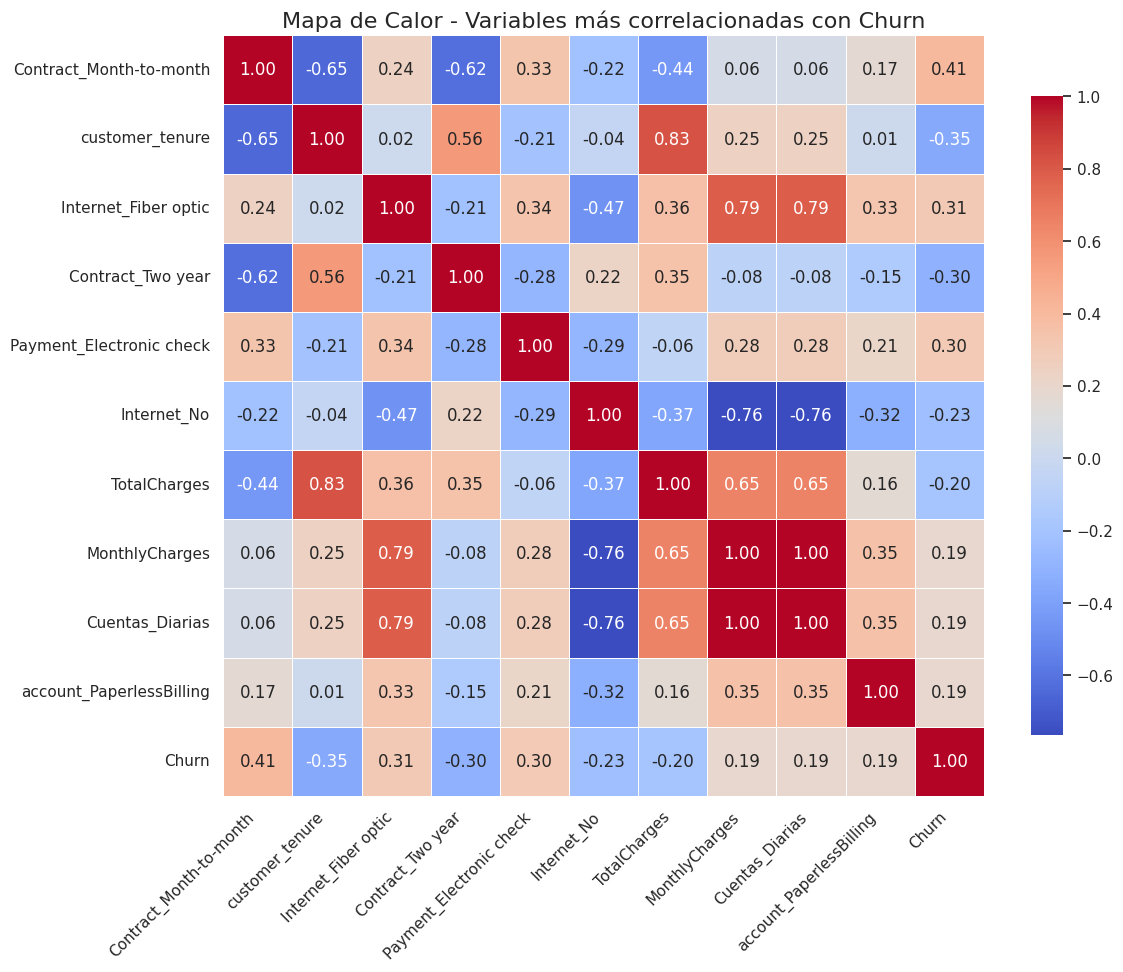

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarse que 'Churn' sea numérico
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({0: 0, 1: 1})

# Seleccionar columnas numéricas
numeric_df = df_corr.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = numeric_df.corr()

# Ordenar por correlación con 'Churn'
churn_corr = corr_matrix['Churn'].drop('Churn').sort_values(key=abs, ascending=False)

# Seleccionar las 10 variables más correlacionadas
top_corr_vars = churn_corr.head(10).index.tolist() + ['Churn']
filtered_corr = corr_matrix.loc[top_corr_vars, top_corr_vars]

# Crear el mapa de calor mejorado
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True,
            cbar_kws={'shrink': .8})
plt.title('Mapa de Calor - Variables más correlacionadas con Churn', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



#📄Informe final



## 1️⃣ Introducción

En el competitivo mercado de telecomunicaciones, la capacidad de una empresa para retener a sus clientes es fundamental para su éxito y rentabilidad. Este análisis se centra en entender los factores que provocan la evasión de clientes, un fenómeno que impacta directamente en los ingresos y la eficiencia operativa de la compañía.

Mediante el examen de datos históricos de clientes, buscamos descubrir qué características y comportamientos están relacionados con el abandono. Al identificar estos patrones, se podrán diseñar acciones específicas para anticipar la pérdida de clientes y mejorar las tasas de retención, contribuyendo así a la estabilidad y crecimiento sostenido del negocio.

## 2️⃣ Limpieza y Tratamiento de Datos:

🔹 **Carga de los datos:**
Los datos fueron importados desde un archivo Json proporcionado por la empresa Telecom X. La información contenía registros de clientes y sus características contractuales, de uso y demográficas.

🔹 **Normalización de nombres de columnas:**
Se eliminaron espacios y se estandarizaron los nombres de columnas para facilitar su manipulación posterior, asegurando consistencia en todo el DataFrame.

🔹 **Conversión de tipos de datos:**
Columnas como TotalCharges fueron convertidas a tipo numérico, corrigiendo registros con errores de formato (por ejemplo, celdas vacías o valores mal ingresados).

🔹**Manejo de valores nulos:**
Se eliminaron o imputaron los registros con valores ausentes en variables clave, como el identificador de cliente o datos financieros, ya que podrían afectar el análisis de comportamiento.

🔹**Revisión de duplicados:**
Se verificó y eliminaron registros duplicados para evitar sesgos en los cálculos estadísticos y visualizaciones.

🔹 **Transformación de variables categóricas:**
Las variables binarias fueron convertidas a formato 0/1 para el modelado, y luego re-mapeadas a etiquetas como "Permanece" o "Abandona" para facilitar la interpretación en los gráficos.

🔹 **Verificación de coherencia en categorías:**
Se revisaron las respuestas de variables categóricas como Genero, Churn, Tipo de Contrato y Método de Pago, estandarizando valores mal escritos o inconsistentes.


## 3️⃣ Análisis Exploratorio de Datos:

Se aplicaron técnicas estadísticas y visuales con el objetivo de examinar el comportamiento de las variables y descubrir relaciones significativas con la evasión de clientes. Este proceso permitió identificar tendencias, distribuciones atípicas y posibles indicadores clave relacionados con el abandono.

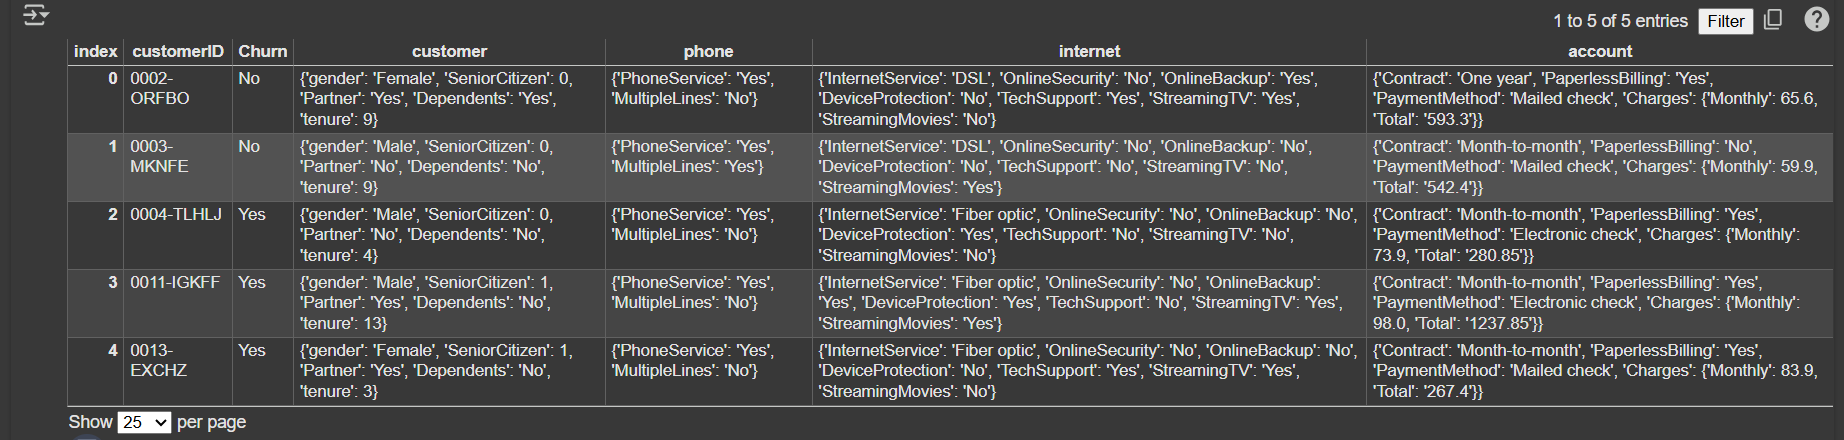

### Distribución general de la evasión
Aproximadamente 26.5% de los clientes han cancelado el servicio, 1869 clientes, según se observa en el siguiente gráfico:

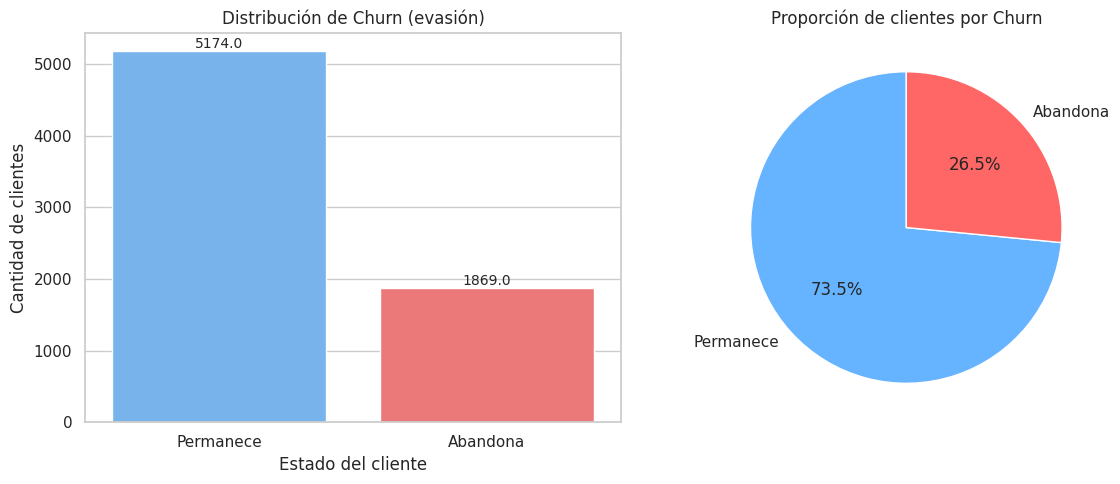

### Análisis por variables categóricas

Se investigó la conexión entre el abandono y factores representados por variables por categorías.

* Servicios de Internet: No se identificaron diferencias significativas en evasión por Servicios de Internet.

* Servicios Teléfonicos: No se identificaron diferencias significativas en evasión por Servicios Teléfonicos.

* **Demográficos:** Se puede observar un porcentage mayor de clientes Senior que abandonan.

* **Tipo de Contrato:** Los clientes que tienen contratos mes a mes son los que más tienden a abandonar el servicio.

* **Método de Pago:** Los usuarios que pagan electrónicamente muestran mayor propensión al abandono que aquellos que eligen otras formas de pago.

* **Tipo de Internet:** La categoria Tipo de Internet destaca la subcategoría Fibra Óptica por su elevada tasa de cancelación.

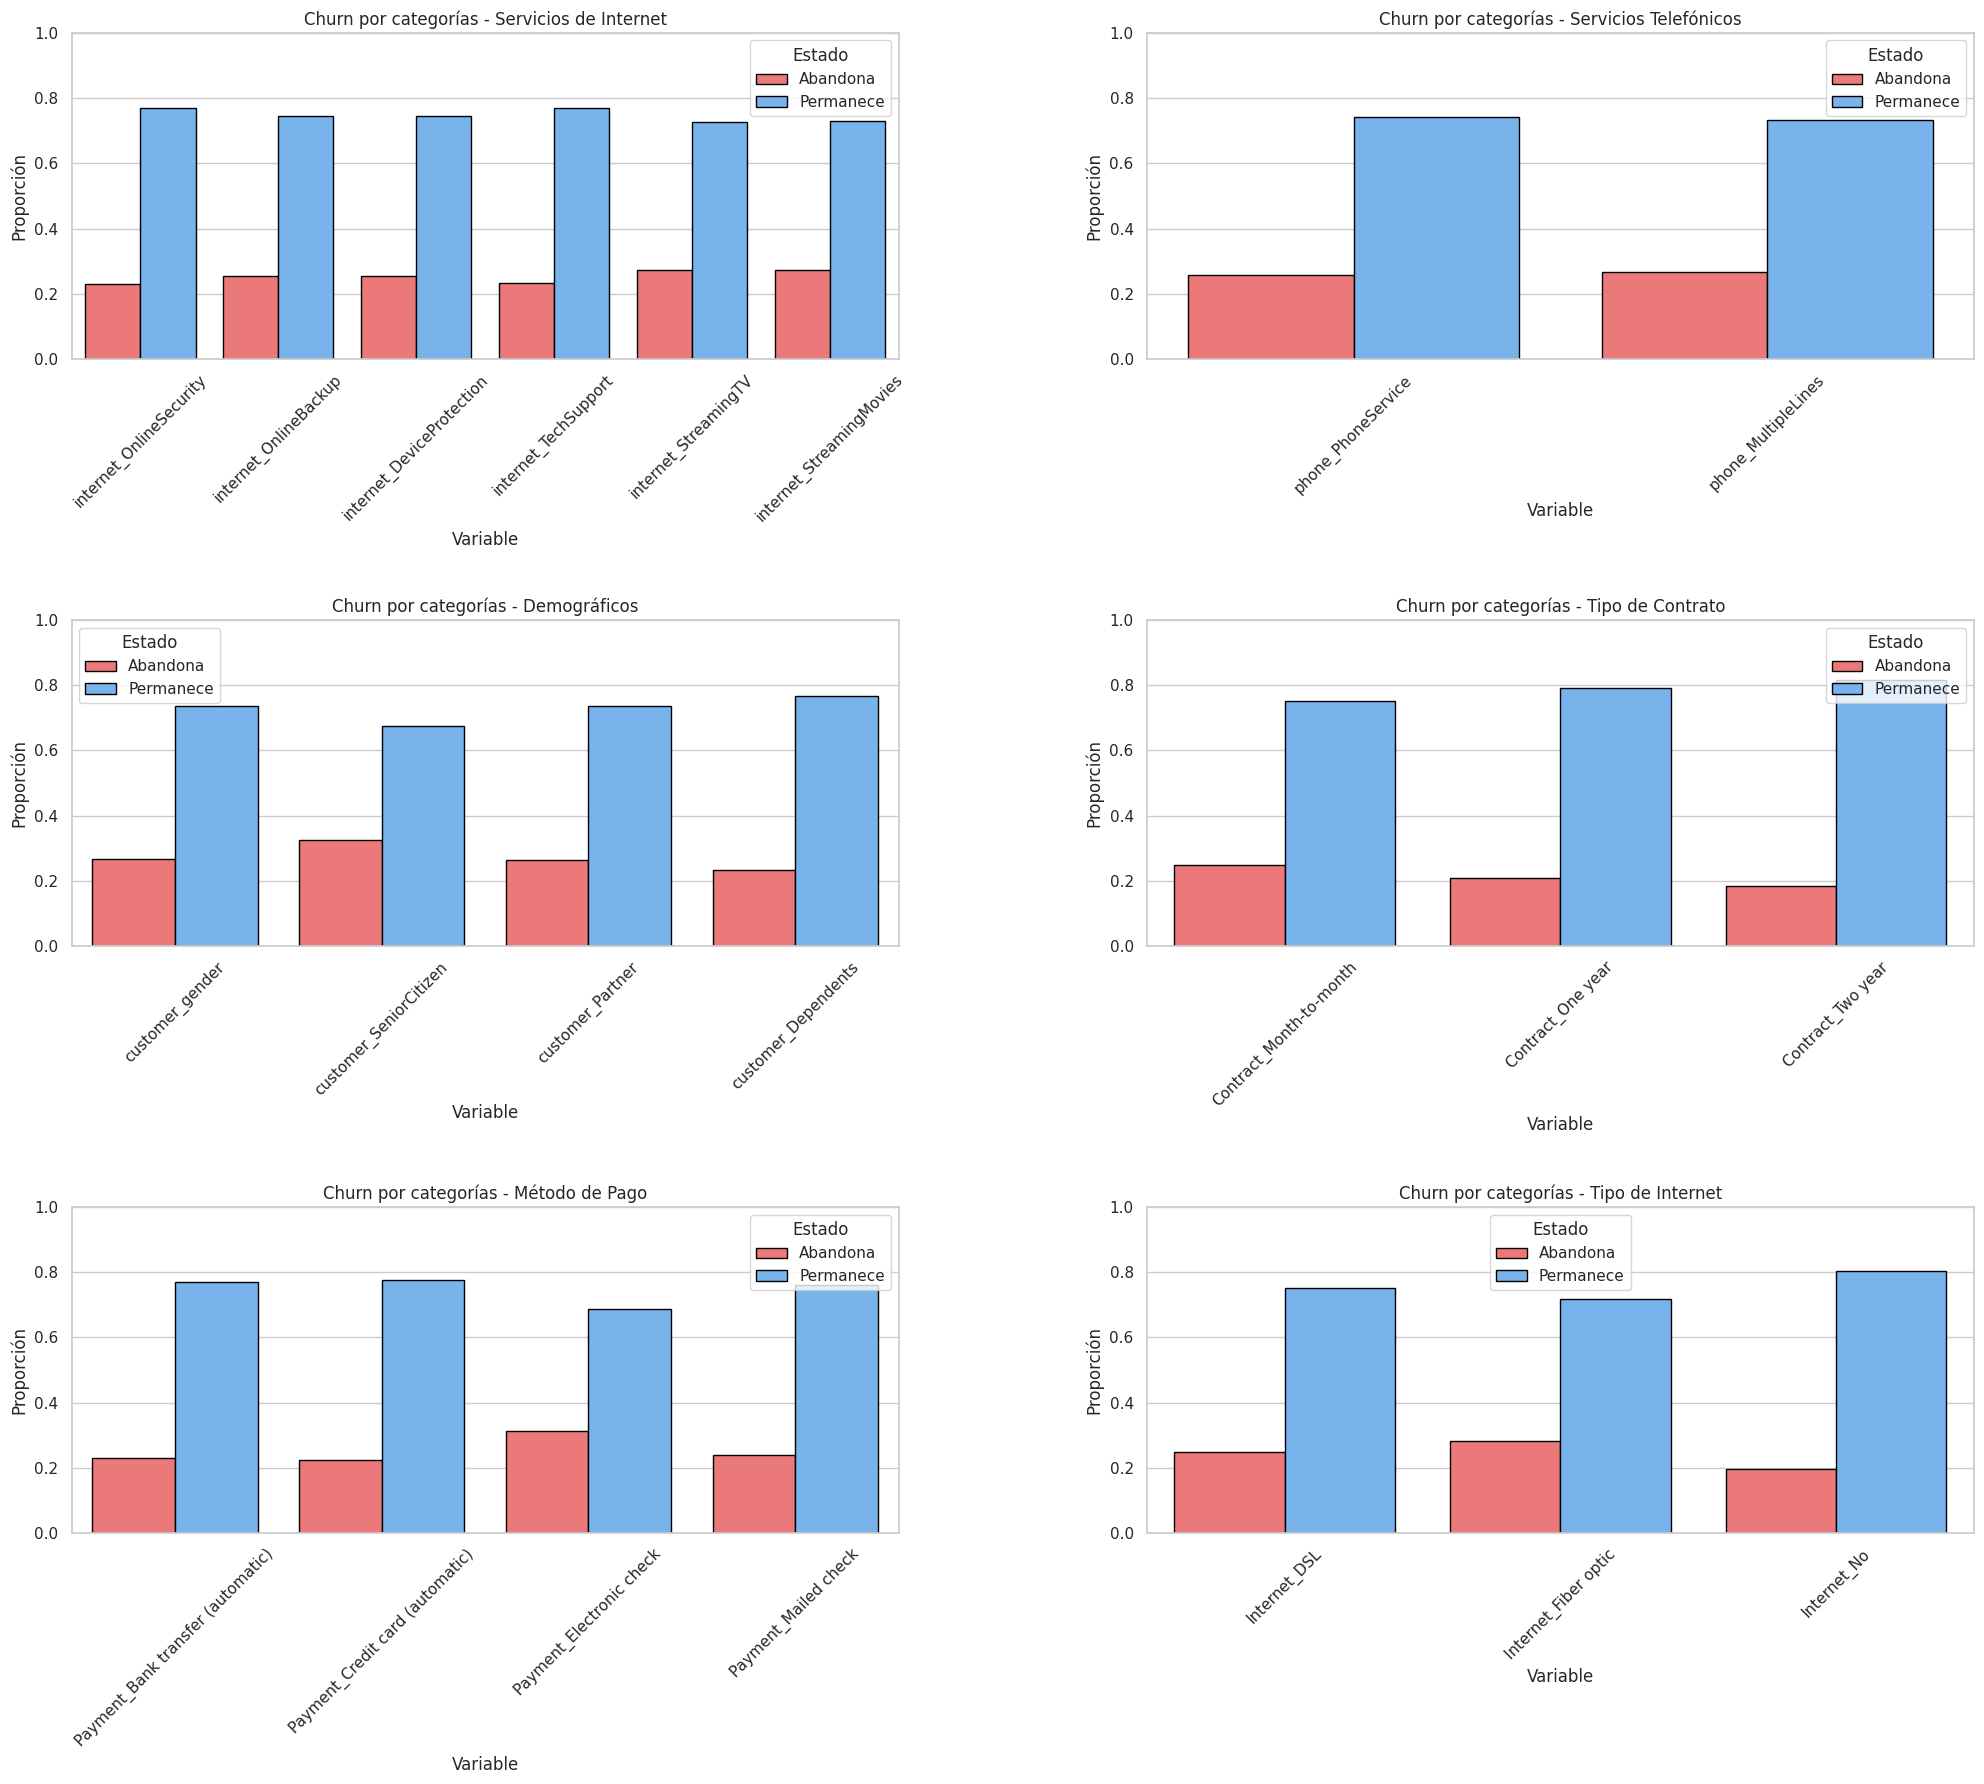)

### Análisis por Variables Numéricas

Se examinó cómo se vinculan las variables binarias con la probabilidad de abandono.

* 1.customer_tenure vs Churn (Tiempo como cliente):

 * Clientes que permanecen: tienen un mayor tiempo promedio con la empresa.

 * Clientes que abandonan: suelen haber estado menos tiempo.

* 2.MonthlyCharges vs Churn (Cargos mensuales):

 * Clientes que abandonan: tienden a tener cargos mensuales más altos.

 * Clientes que permanecen: se concentran en rangos de menor facturación.

* 3.TotalCharges vs Churn (Cargos totales):

 * Clientes que permanecen: tienen mayores cargos acumulados, lo que sugiere mayor antigüedad y fidelidad.

 * Clientes que abandonan: han gastado menos en total.

* 4.Cuentas_Diarias vs Churn (Variable propia):

 * Clientes que abandonan: tienen ligeramente más cuentas diarias.

 * Clientes que permanecen: presentan un rango más variado.


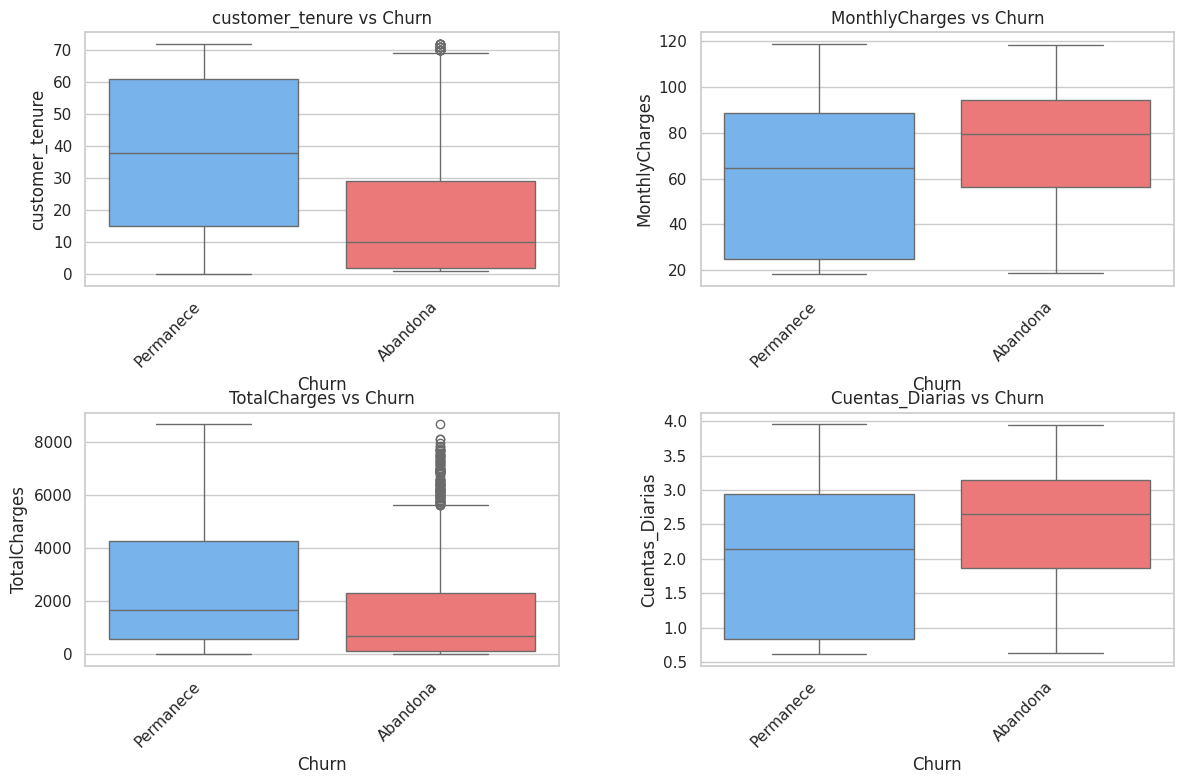

### Análisis por Variables Binarias

Se estudió la asociación entre el churn y distintas características binarias de los usuarios.

📌1. Servicios:

* Variables: Seguridad online, Backup, Protección de dispositivos, Soporte técnico, Streaming TV, Streaming Películas

* En todos los servicios, los clientes que no tienen el servicio (No) presentan mayor tasa de abandono.

* Ejemplos:

 * OnlineSecurity - No: ~27% abandona

 * TechSupport - No: ~28% abandona

 * Mientras que quienes sí tienen los servicios, el churn cae al 10-14%.

📌2. Teléfono:

* Variables: Línea múltiple, Servicio de teléfono

 * Los que no tienen PhoneService abandonan más (26.7%) que los que sí (~20%).

 * Múltiples líneas no influyen tanto, aunque hay una leve mayor tasa de churn en quienes tienen múltiples líneas (~28%).


📌 3. Demográficos

* Variables: Género, Senior, Pareja, Dependientes

* Senior citizens (SeniorCitizen_Sí) tienen mayor churn (41.7%) que los que no lo son (~23.6%).

* Sin pareja (Partner_No) y sin dependientes (Dependents_No) tienen tasas de churn más altas (~30-32%).

* Género no parece influir (mismos valores para ambos).


📌 4. Contrato
* Variables: Mes a mes, 1 año, 2 años

* Contrato mensual → churn muy alto (~43%).

* Contrato anual o bianual → churn muy bajo (~12%-2%).


📌 5. Método de pago
* Variables: Transferencia bancaria, Tarjeta, Cheque electrónico, Cheque por correo.

* Electronic check tiene el churn más alto (~29.5%).

* Métodos automáticos (bank transfer y credit card) tienen tasas menores (~10-20%).


📌 6. Tipo de Internet

* Variables: DSL, Fibra óptica, Sin internet

* Clientes con fibra óptica tienen el churn más alto (~32%).

* Los que no tienen internet o usan DSL abandonan menos (~7-14%).


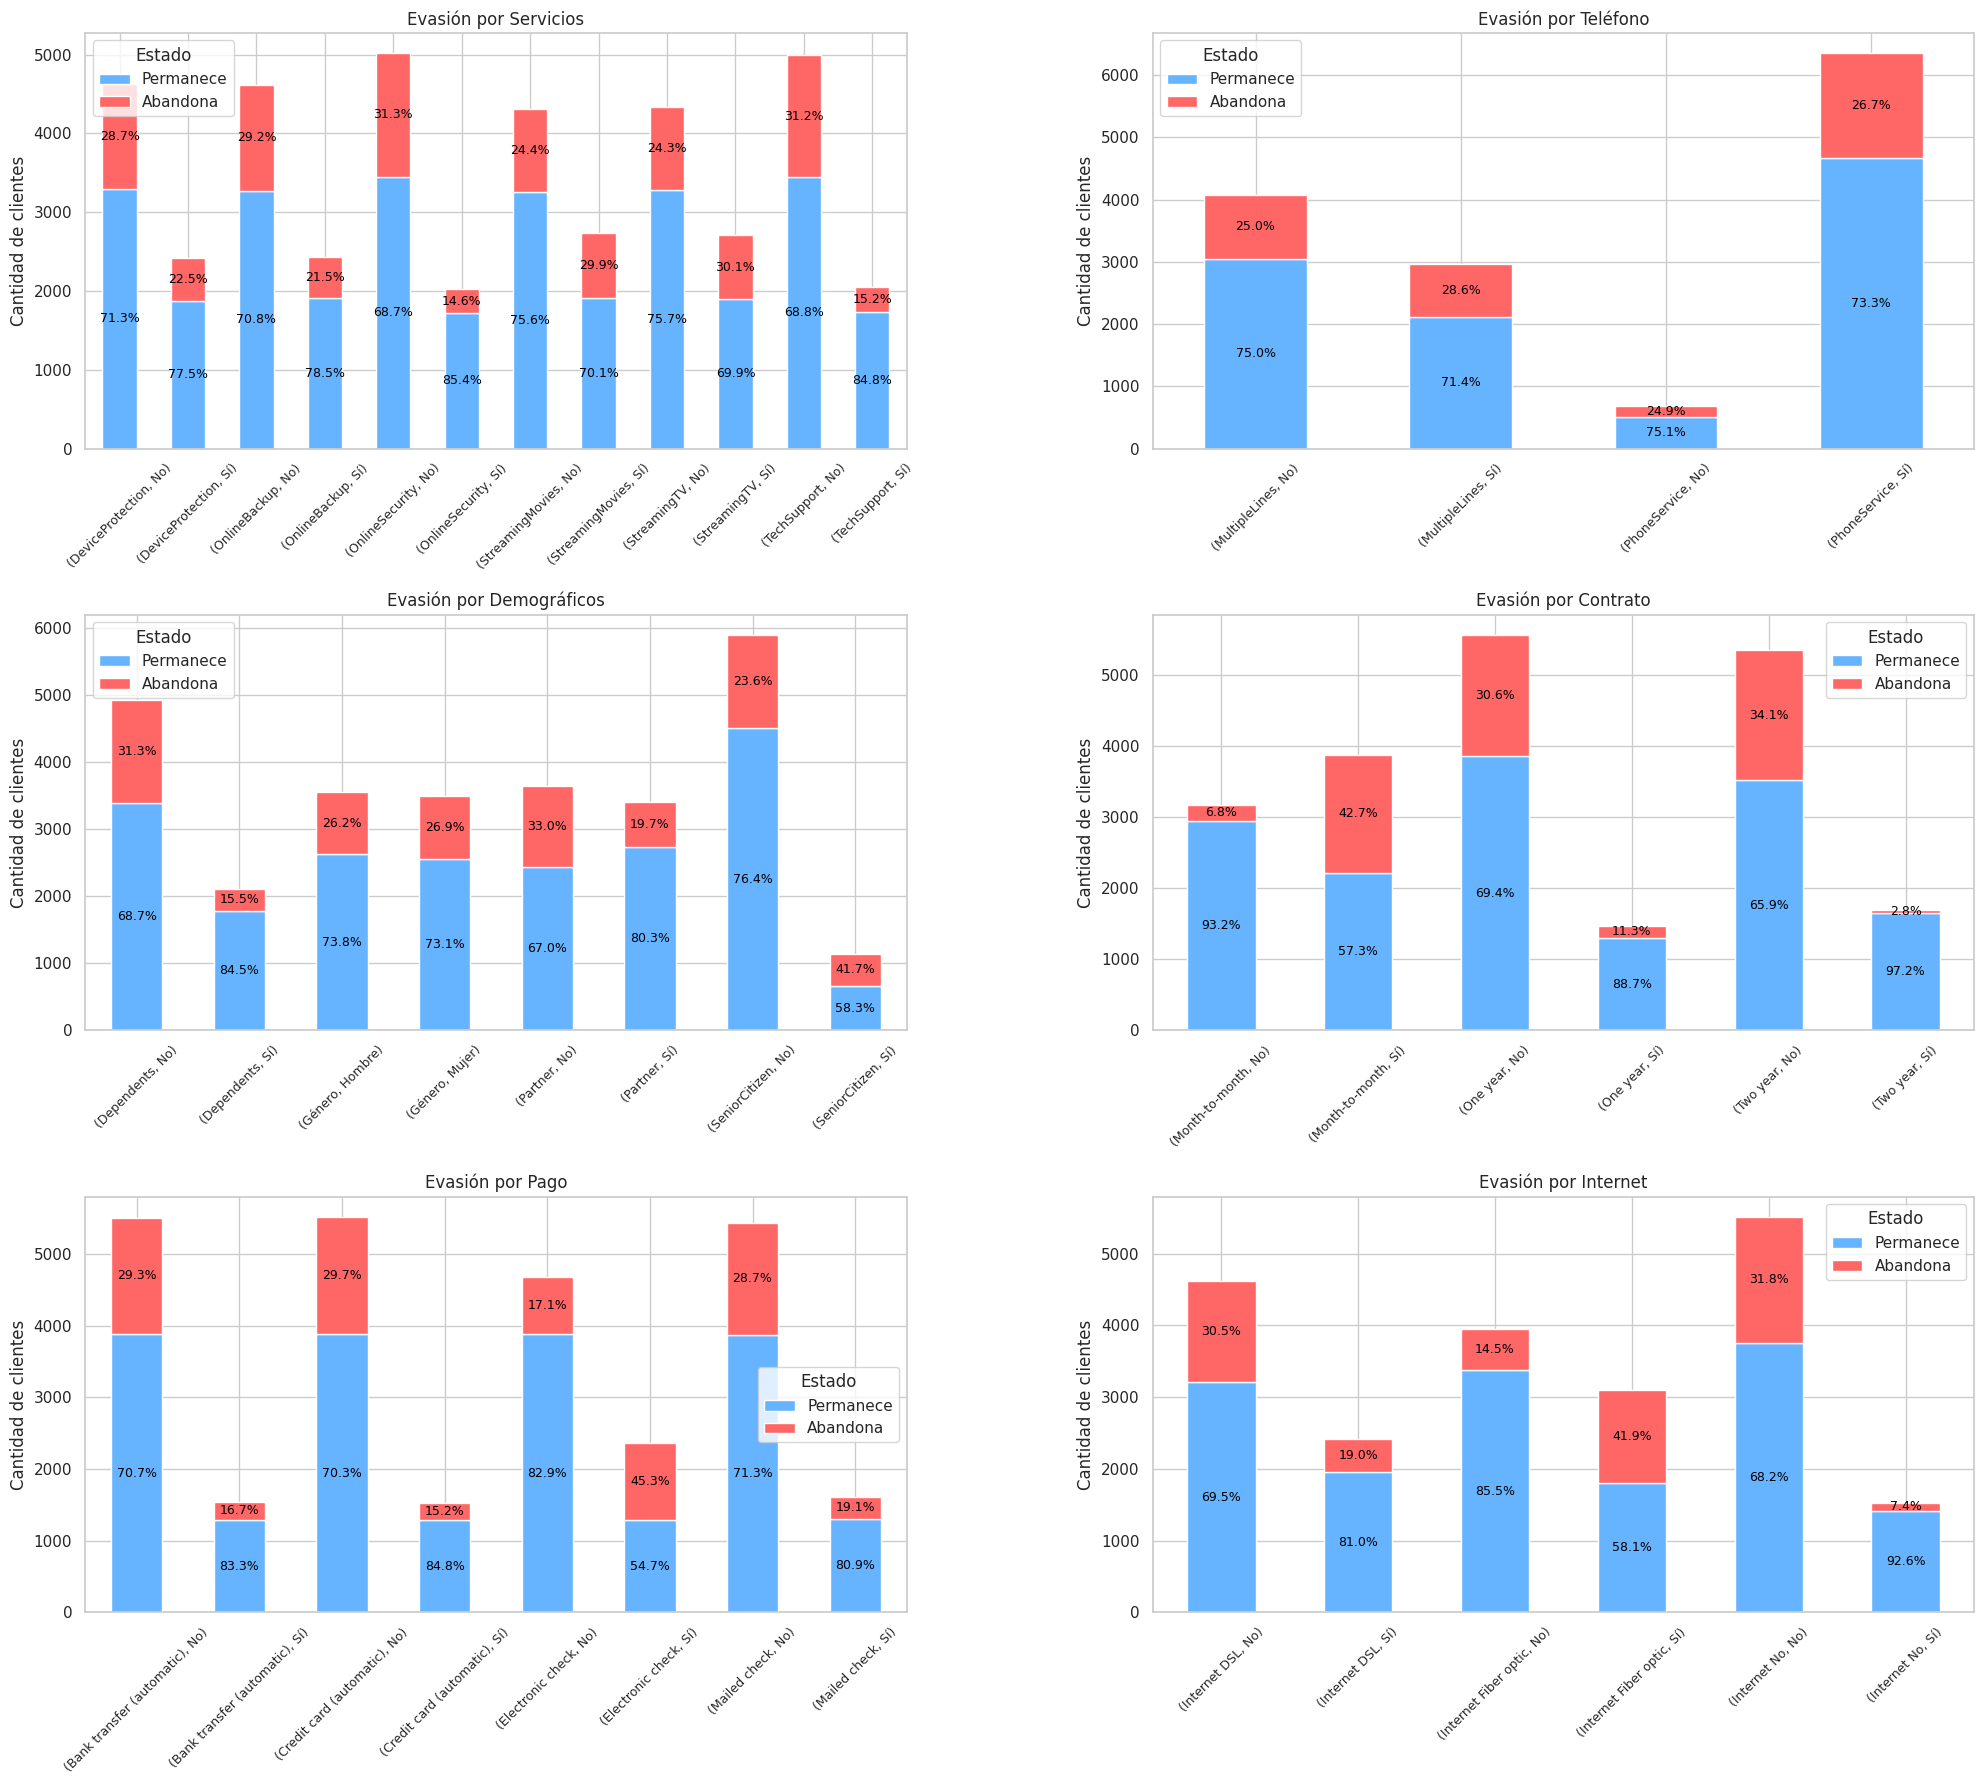

### Gráfico de calor (heatmap) de tasas de evasión por variable y subcategorías

Observando el grafico, se pueden clasificar el % de Tasa de Evasión: Crítico (>40%) y Moderadamente alto (30-40%), Promedio/Esperado (15-30%) y Bajo/Positivo (< 15 %). Nos enfocaremos en la Crítica:

* Contratos mensuales: 42.7%
* Fibra óptica: 41.9 %
* Pago electrónico: Crítico 45.3 %
* Clientes Senior: Crítico  41.7 %

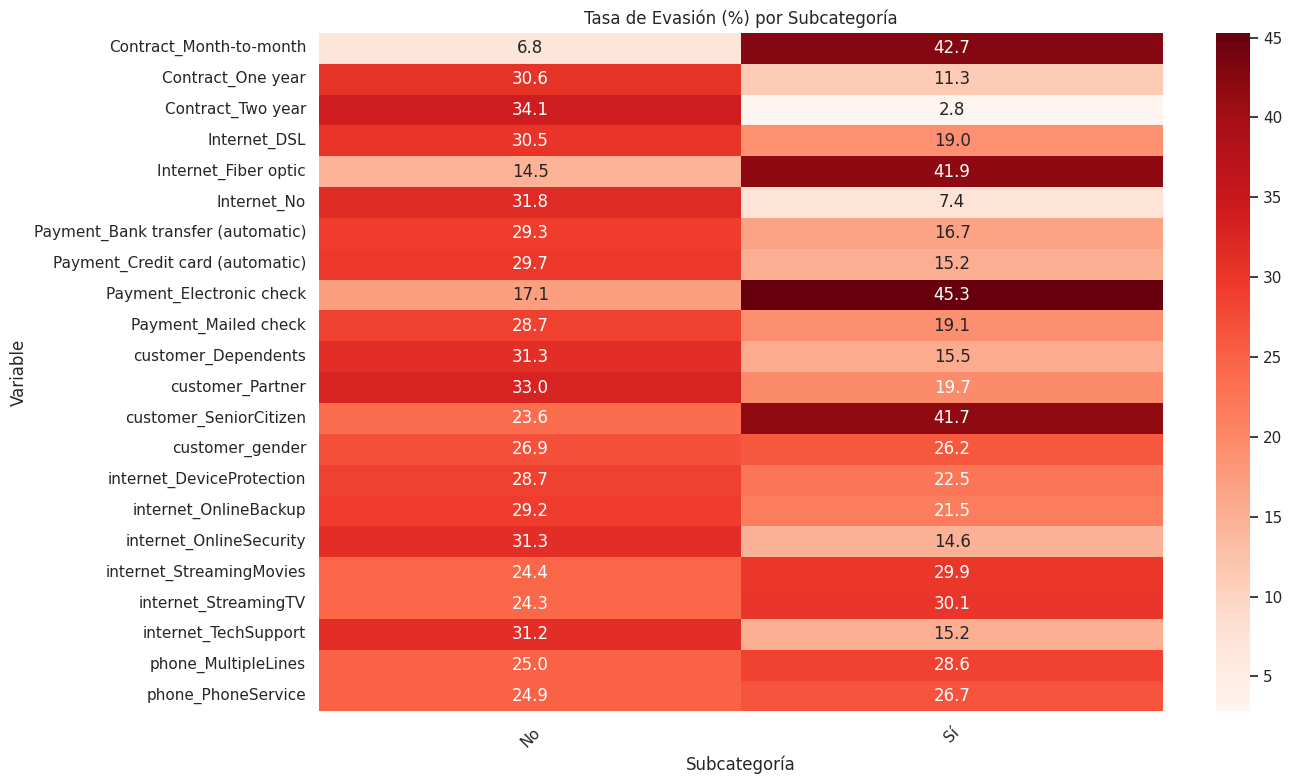

### Sankey diagram con etiquetas descriptivas

En el siguiente gráfico se refuerza lo dicho anteriormete y se deja en constancia que no depende del género:

Mayor % de evasión:

* Fibra óptica


In [ ]:
fig_Sankey.show()

### Mapa de calor - Correlación con Churn

Este mapa de calor muestra la correlación lineal de Pearson entre las variables seleccionadas y la variable objetivo Churn (abandono). El valor de correlación varía entre:

* +1: correlación positiva perfecta (a mayor valor de la variable, mayor churn).

* -1: correlación negativa perfecta (a mayor valor de la variable, menor churn).

* 0: sin correlación lineal.

📈 **Variables con mayor correlación positiva con churn:**
* Contract_Month-to-month → +0.41

Los clientes con contrato mensual tienen mayor probabilidad de abandonar.

* Internet_Fiber optic → +0.31

Quienes tienen fibra óptica tienden a evadir más que quienes no.

* Payment_Electronic check → +0.30

El uso del cheque electrónico está asociado a mayor churn.

📉 **Variables con mayor correlación negativa (protegen contra el churn):**
* customer_tenure → –0.35

A mayor antigüedad del cliente, menor probabilidad de abandono.

* Contract_Two year → –0.30

Contratos de dos años están asociados a baja evasión.

* TotalCharges → –0.20

Clientes con mayor facturación acumulada (clientes antiguos) tienden a quedarse.

➡️​ **Las variables que más influyen en la evasión son:**

* Tipo de contrato: los contratos mensuales se asocian fuertemente con el abandono, mientras que los de largo plazo (dos años) lo reducen.

* Método de pago: el cheque electrónico parece ser un predictor de alta evasión.

* Antigüedad del cliente (tenure): es un factor clave para la permanencia.

* Tecnología de Internet: sorprendentemente, quienes usan fibra óptica tienen mayor churn que otros.

Este análisis refuerza la idea de que clientes nuevos, con contrato mensual, pagando con medios poco automatizados y usando fibra óptica son los que más se van.

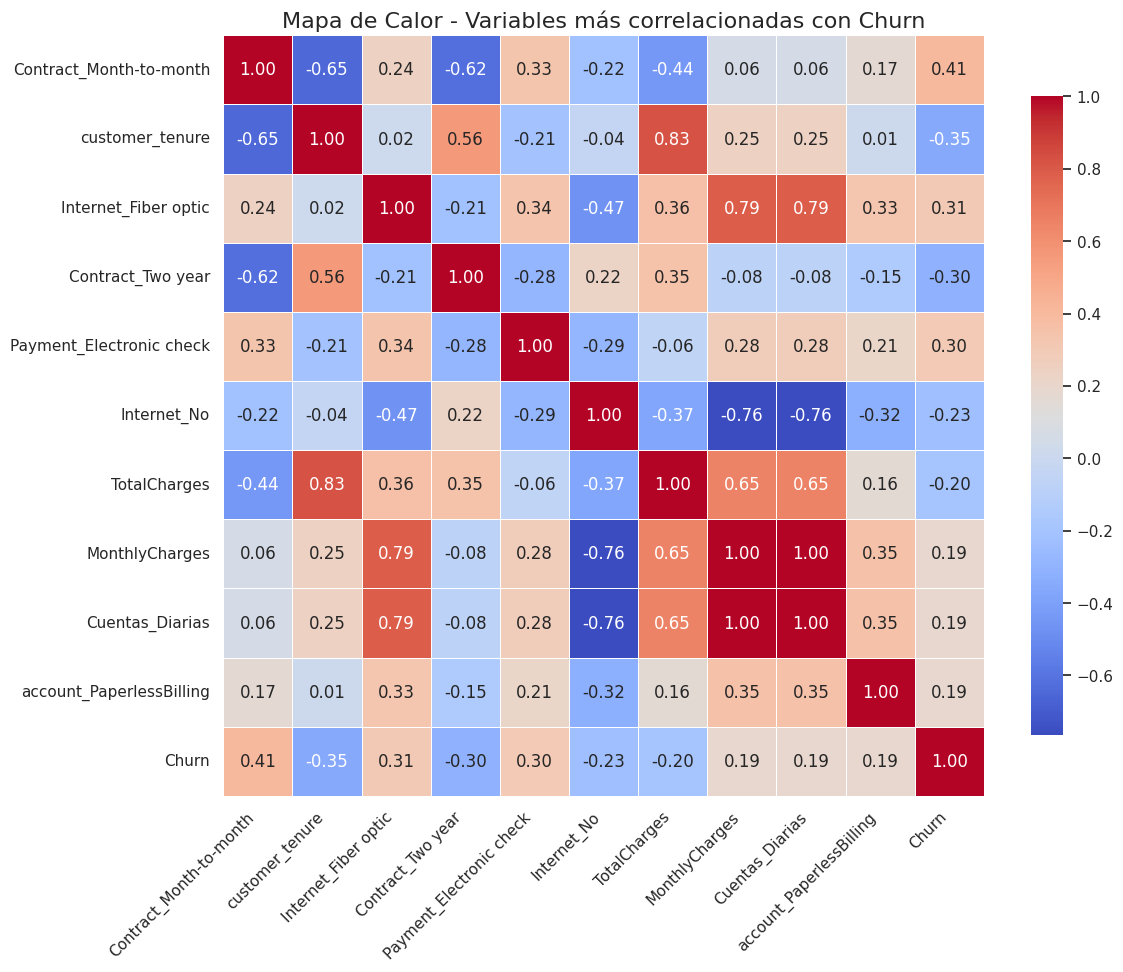

## 4️⃣ Conclusiones e Insights:

El análisis integral de los datos de clientes revela una tasa de churn del 26.5%, con 1869 clientes que han cancelado el servicio. Este comportamiento de abandono está fuertemente influenciado por una combinación de factores contractuales, demográficos, de servicios contratados y formas de pago.

🔍 Factores que más contribuyen al churn:

1. Contrato mensual

* Es el factor con mayor tasa de evasión (~43%) y alta correlación positiva con el churn (+0.41).

* Los contratos a 1 o 2 años muestran menor probabilidad de abandono.

2. Pago por cheque electrónico

* Este método tiene una tasa de churn crítica (~45%) y una correlación significativa (+0.30).

* Métodos automáticos como débito o tarjeta están asociados a una mayor fidelización.

3. Tipo de Internet – Fibra óptica

* Los clientes que usan fibra óptica tienen una tasa de churn muy alta (~42%) y una correlación positiva moderada (+0.31).

* Esto puede reflejar expectativas no cumplidas, problemas de servicio o mayor competencia en ese segmento.

4. Clientes nuevos

* El customer_tenure tiene correlación negativa significativa (–0.35) con el churn.

* Los clientes que abandonan suelen tener menos tiempo en la empresa y bajos cargos totales (TotalCharges).

5. Clientes senior y sin vínculos personales

* Los clientes mayores (Senior) presentan tasas de abandono más altas (~41.7%).

* También se observa mayor churn en quienes no tienen pareja ni dependientes.

6. Falta de servicios adicionales (seguridad, soporte, etc.)

* Los clientes que no contratan servicios extra presentan una tasa de churn más alta (~27%-28%).

* Tener Soporte técnico o Seguridad en línea reduce significativamente el abandono.

7. Servicio telefónico (Línea múltiple, Servicio de teléfono)

* Tener servicio telefónico puede estar asociado a una mayor permanencia.
* Múltiples líneas no cambian mucho la situación.

## 5️⃣​Recomendaciones:

💡 **Retención Temprana:** Implementar campañas de fidelización para clientes nuevos durante sus primeros meses.

​🌐 **Migración a contratos de largo plazo:** Ofrecer incentivos o descuentos para que los usuarios pasen de contratos mensuales a anuales o bianuales.

💳 **Promover pagos automáticos:** Fomentar el uso de métodos como tarjeta o débito automático, desincentivando el uso de cheque electrónico.

📞 **Agregar valor a través de servicios adicionales:** Ofrecer combos o paquetes que incluyan seguridad online, soporte técnico, etc.

📉 **Revisar oferta de fibra óptica:** Evaluar si la experiencia del cliente con fibra óptica está alineada con sus expectativas o si hay necesidad de mejorarla.

👵 **Segmentación por edad y situación personal:** Crear estrategias específicas para clientes senior y personas sin vínculos familiares.